<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/11_workalong_01_fft.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook explores Fourier transforms and the `numpy.fft` package on some simple examples and realistic problems.

In [1]:
""" Import libraries. """
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

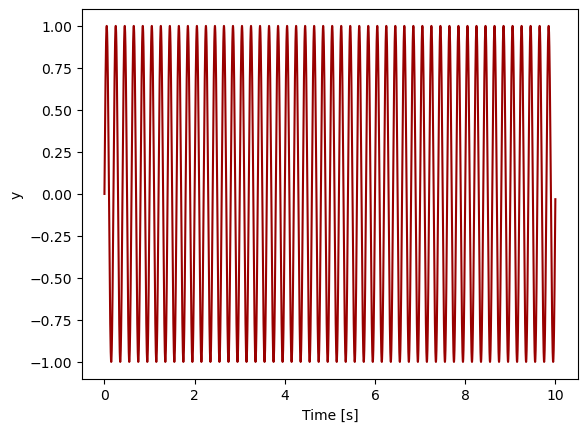

In [4]:
""" Create and plot a test signal. """
frequency = 5 # Hz

# create a time variable
dt = 0.001 # seconds
t = np.arange(0, 10, dt)

# create a test signal
y = np.sin(2*np.pi*frequency*t)

fig, ax = plt.subplots()

ax.plot(t,y, color = "#990000");

ax.set_xlabel("Time [s]")
ax.set_ylabel("y")
plt.show()


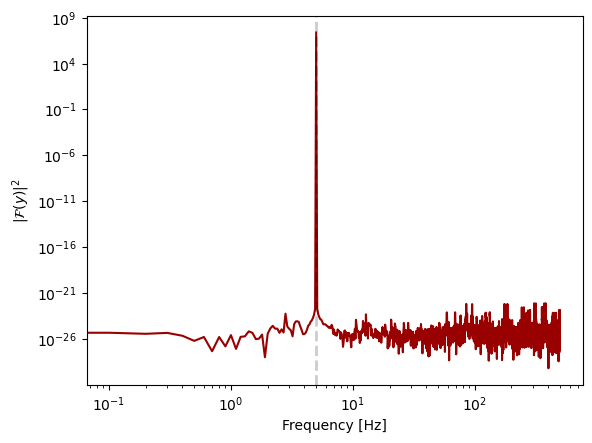

In [8]:
""" Compute the FFT of the test signal. """
# do the FFT
y_fft = fft.rfft(y)

# compute the power spectrum from the fft
y_power = np.abs(y_fft)**2

# get the frequencies
freqs = fft.rfftfreq(len(y), dt)

# plot the power spectrum
fig, ax = plt.subplots()
ax.plot(freqs, y_power, color = "#990000")
# set axis labels
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("$|\mathcal{F}(y)|^2$")

# make it log-log
ax.set_xscale('log')
ax.set_yscale('log')

# plot a line at the known frequency of the test signal
ax.axvline(frequency, color = "black", linestyle = "--", alpha = 0.2, linewidth = 2)

plt.show()


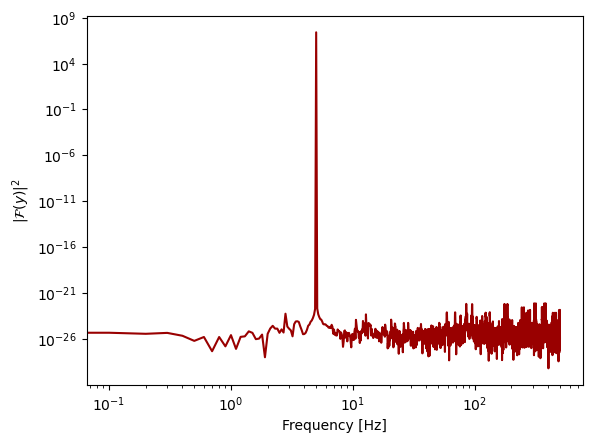

In [9]:
""" Make a function to compute the power spectrum of a signal. """

def power_spectrum(y, t):
    """ Compute the power spectrum of a signal. Returns frequencies and the power spectrum: freqs, y_power """
    # do the FFT
    y_fft = fft.rfft(y)

    # compute the power spectrum from the fft
    y_power = np.abs(y_fft)**2

    # calculate dt
    dt = t[1] - t[0]

    # get the frequencies
    freqs = fft.rfftfreq(len(y), dt)

    # return
    return freqs, y_power

# also make a function for plotting
def plot_power_spectrum(freqs, y_power):
    """ Plots the power spectrum of a signal.  Returns the figure and axes: fig, ax """
    # plot the power spectrum
    fig, ax = plt.subplots()
    ax.plot(freqs, y_power, color = "#990000")
    # set axis labels
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel("$|\mathcal{F}(y)|^2$")

    # make it log-log
    ax.set_xscale('log')
    ax.set_yscale('log')

    return fig, ax

# test the functions
freqs, y_power = power_spectrum(y, t)
fig, ax = plot_power_spectrum(freqs, y_power)
plt.show()

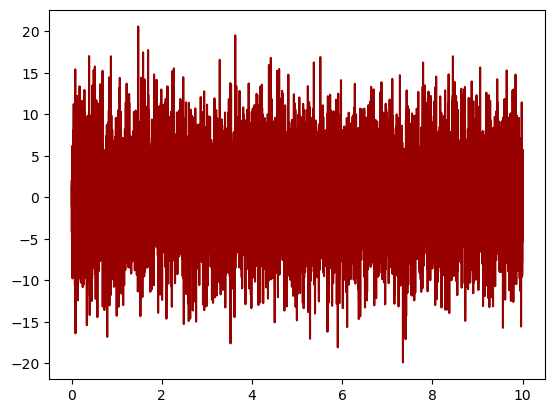

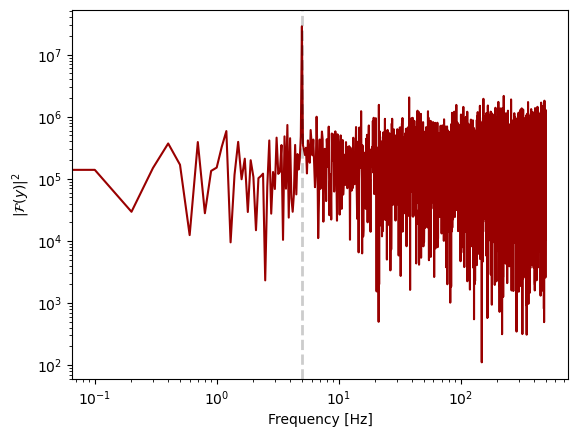

In [12]:
""" Get the power spectrum with noise added. """
y_noisy = y + np.random.normal(0, 5, len(y))

# plot the noisy signal
fig, ax = plt.subplots()
ax.plot(t, y_noisy, color = "#990000");
plt.show()

# get the power spectrum
freqs, y_power = power_spectrum(y_noisy, t)

# plot the power spectrum
fig, ax = plot_power_spectrum(freqs, y_power)

# plot a line at the known frequency of the test signal
ax.axvline(frequency, color = "black", linestyle = "--", alpha = 0.2, linewidth = 2)

plt.show()

# Real data

Download this data file: https://github.com/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/11_spectral_analysis_intro/cannelton_flow.dat

The data file was obtained from https://waterdata.usgs.gov/nwis/dv/?site_no=03303280&PARAmeter_cd=00060 on 11/10/23 at about 11:16 AM Eastern.  It represents daily stream flow from 1975-present at a gauge on the Ohio River in Cannelton, IN

In [ ]:
""" Load the data file. """


In [ ]:
""" Plot a time series of the data. """


In [ ]:
""" Plot the power spectrum of the data. """


In [ ]:
""" Plot the power spectrum of the data with the x-axis as period instead. """
